In [33]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold,cross_val_score,train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder,OrdinalEncoder
from sklearn.metrics import accuracy_score,classification_report
from xgboost import XGBClassifier
from catboost import CatBoostClassifier,Pool
import matplotlib.pyplot as plt
import matplotlib.colors as ListedColormap
from sklearn.manifold import TSNE

In [2]:
df = pd.read_csv('adult_data.csv',header = None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df = pd.read_csv('adult_data.csv',header = None,
                names = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation',
                           'relationship','race','sex','capital-gain','capital-loss','hours-per-week',
                           'native-country','class'])
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  class           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [6]:
df[df.duplicated]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


In [7]:
df = df.drop_duplicates(keep='first')
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [8]:
df = df.reset_index(drop=True)
df.shape

(32537, 15)

In [9]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

In [10]:
print((df == 0).value_counts())

age    workclass  fnlwgt  education  education-num  marital-status  occupation  relationship  race   sex    capital-gain  capital-loss  hours-per-week  native-country  class
False  False      False   False      False          False           False       False         False  False  True          True          False           False           False    28306
                                                                                                            False         True          False           False           False     2712
                                                                                                            True          False         False           False           False     1519
Name: count, dtype: int64


In [11]:
(df == 0).sum()

age                   0
workclass             0
fnlwgt                0
education             0
education-num         0
marital-status        0
occupation            0
relationship          0
race                  0
sex                   0
capital-gain      29825
capital-loss      31018
hours-per-week        0
native-country        0
class                 0
dtype: int64

<Axes: >

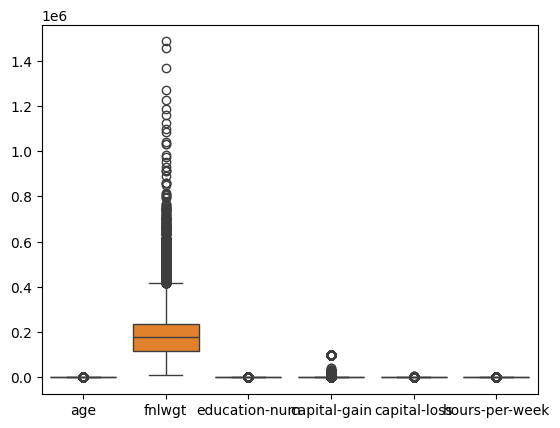

In [12]:
import seaborn as sns
sns.boxplot(df)

In [13]:
for col in df:
    print(col,df[col].unique(),df[col].nunique())

age [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87] 73
workclass [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked'] 9
fnlwgt [ 77516  83311 215646 ...  34066  84661 257302] 21648
education [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th'] 16
education-num [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8] 16
marital-status [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed'] 7
occupation [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-f

In [14]:
for col in df:
    print(col,(df[col] == " ?").sum())

age 0
workclass 1836
fnlwgt 0
education 0
education-num 0
marital-status 0
occupation 1843
relationship 0
race 0
sex 0
capital-gain 0
capital-loss 0
hours-per-week 0
native-country 582
class 0


In [15]:
df['workclass'] = df['workclass'].replace(' ?',df['workclass'].mode()[0])
df['occupation'] = df['occupation'].replace(' ?',df['occupation'].mode()[0])
df['native-country'] = df['native-country'].replace(' ?',df['native-country'].mode()[0])

In [16]:
df = df.drop(columns = ['capital'workclass','education','marital-status','occupation',-gain','capital-loss'],axis = 1)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


In [17]:
(df == ' ?').sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
hours-per-week    0
native-country    0
class             0
dtype: int64

In [18]:
(df == 0).sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
hours-per-week    0
native-country    0
class             0
dtype: int64

In [19]:
X = df.drop('class',axis = 1)
y = df['class']

In [20]:
 numeric_cols = ['age', 'fnlwgt', 'education-num', 'hours-per-week'] 
categorical_cols = ['workclass','education','marital-status','occupation', 
                    'relationship','race','sex','native-country','class']

# 1. Clean string columns (remove spaces)
# df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# 2. Numeric columns
numeric_cols = ['age', 'fnlwgt', 'education-num', 'hours-per-week']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[numeric_cols])
X_scaled = pd.DataFrame(X_scaled, columns=numeric_cols)

# 3. Ordinal encode education
education_order = [
    ' Preschool',' 1st-4th',' 5th-6th',' 7th-8th',' 9th',' 10th',' 11th',' 12th',
    ' HS-grad',' Some-college',' Assoc-acdm',' Assoc-voc',
    ' Bachelors',' Masters',' Doctorate',' Prof-school'
]
ord_enc = OrdinalEncoder(categories=[education_order])
df['education'] = ord_enc.fit_transform(df[['education']])

# 4. Label encode other categoricals
le = LabelEncoder()
other_cats = ['workclass','marital-status','occupation',
              'relationship','race','sex','native-country','class']
df_encoded = df[other_cats].apply(lambda col: le.fit_transform(col))

# 5. Combine everything
X_final = pd.concat([X_scaled, df_encoded.drop('class', axis=1), df['education']], axis=1)
y = df_encoded['class']

print(X_final.head())
print(y.head())

        age    fnlwgt  education-num  hours-per-week  workclass  \
0  0.030390 -1.063569       1.134777       -0.035664          6   
1  0.836973 -1.008668       1.134777       -2.222483          5   
2 -0.042936  0.245040      -0.420679       -0.035664          3   
3  1.056950  0.425752      -1.198407       -0.035664          3   
4 -0.776193  1.408066       1.134777       -0.035664          3   

   marital-status  occupation  relationship  race  sex  native-country  \
0               4           0             1     4    1              38   
1               2           3             0     4    1              38   
2               0           5             1     4    1              38   
3               2           5             0     2    1              38   
4               2           9             5     2    0               4   

   education  
0       12.0  
1       12.0  
2        8.0  
3        6.0  
4       12.0  
0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64


In [21]:
xgb = XGBClassifier(n_estimators = 200,
                   use_label_encoder = False,
                   eval_metric = 'logloss',
                   learning_rate = 0.08,
                   max_depths = 6,
                   reg_alpha = 0.01,
                   reg_lambda = 5)

In [22]:
skf = StratifiedKFold(n_splits = 5,random_state = 42,shuffle = True)
scores = cross_val_score(xgb,X_scaled,y,cv=skf,scoring = 'accuracy')
print("Accuracy score:",scores)
print("Mean Accuracy:",scores.mean())

Accuracy score: [0.79886294 0.80485556 0.79867835 0.79975411 0.79483633]
Mean Accuracy: 0.7993974575533945


In [23]:
data_tsne = TSNE(n_components = 2,perplexity = 30).fit_transform(X_scaled)
data_tsne

array([[ 68.67924  ,  80.20734  ],
       [ 29.364983 ,  34.595364 ],
       [-77.11264  , -27.139366 ],
       ...,
       [ 30.931276 , -94.92944  ],
       [-78.165565 ,  43.353806 ],
       [ -4.7985897, -56.04433  ]], dtype=float32)

In [24]:
model = XGBClassifier()
model.fit(data_tsne,y)

# Create meshgrid
x_min,x_max = data_tsne[:,0].min()-1,data_tsne[:,0].max()+1
y_min,y_max = data_tsne[:,1].min()-1,data_tsne[:,1].max()+1
xx , yy = np.meshgrid(np.linspace(x_min,x_max,500),
                      np.linspace(y_min,y_max,500))

#predict on meshgrid
Z = model.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)

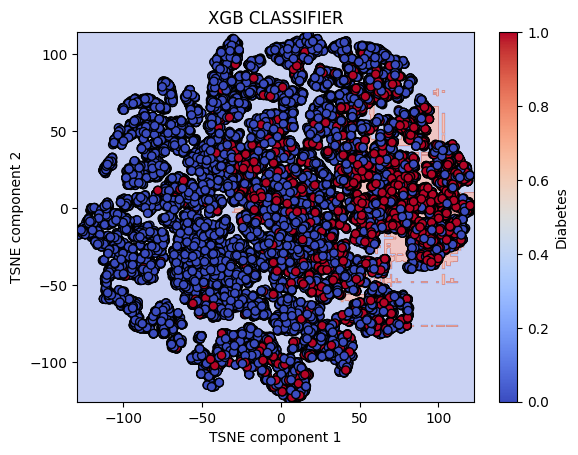

In [25]:
# plot decision boundary
plt.contourf(xx,yy,Z,alpha=0.3,cmap = plt.cm.coolwarm)
plt.scatter(data_tsne[:,0],data_tsne[:,1],c=y,cmap = plt.cm.coolwarm,edgecolors = 'k')
plt.title("XGB CLASSIFIER")
plt.xlabel("TSNE component 1")
plt.ylabel("TSNE component 2")
plt.colorbar(label = 'Diabetes')
plt.show()

## CAT

In [28]:
cat_features = X.select_dtypes(include=['object']).columns.tolist()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [36]:
model2 = CatBoostClassifier(iterations = 500,learning_rate=0.1,depth = 6,loss_function = 'Logloss',
                           eval_metric = 'Accuracy',random_seed = 42,verbose=100)

In [37]:
train_pool = Pool(X_train,y_train,cat_features = cat_features) 
test_pool =  Pool(X_test,y_test,cat_features = cat_features) 

In [38]:
model2.fit(train_pool,eval_set = test_pool , early_stopping_rounds = 50)

y_pred = model2.predict(X_test)
y_pred

0:	learn: 0.8210073	test: 0.8203749	best: 0.8203749 (0)	total: 161ms	remaining: 1m 20s
100:	learn: 0.8502055	test: 0.8415796	best: 0.8421942 (84)	total: 4.76s	remaining: 18.8s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.8426551936
bestIteration = 110

Shrink model to first 111 iterations.


array([0, 0, 0, ..., 0, 0, 1])

In [40]:
# XGBoost
y_pred = model.predict(X)
print("Accuracy:",accuracy_score(y_pred,y))
print("Classification Report:\n",classification_report(y_pred,y))

Accuracy: 0.8478962412023235
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.88      0.90     26117
           1       0.59      0.73      0.65      6420

    accuracy                           0.85     32537
   macro avg       0.76      0.80      0.78     32537
weighted avg       0.86      0.85      0.85     32537



In [39]:
#CAT BOOST
print("Accuracy:",accuracy_score(y_pred,y_test))
print("Classification Report:\n",classification_report(y_pred,y_test))

Accuracy: 0.8426551936078672
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90      5201
           1       0.59      0.72      0.65      1307

    accuracy                           0.84      6508
   macro avg       0.76      0.80      0.77      6508
weighted avg       0.86      0.84      0.85      6508

